## **t-SNE: Theory and Visualization Examples**  

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a popular dimensionality reduction and visualization technique, especially useful for high-dimensional data. It is often used to explore patterns in datasets, such as clusters and separations between different classes.  

---

## **1. Theory Behind t-SNE**  

Unlike PCA, which preserves **global structure** by maximizing variance, t-SNE focuses on preserving **local structure**—meaning it keeps similar data points close together in the low-dimensional space.  

### **Step-by-Step Mechanics**  

1. **Compute Pairwise Similarities in High-Dimensional Space:**  
   - Given data points $ x_i $, define similarity between points using **Gaussian-distributed probabilities**:  
     
     > \$ \Huge
     p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}
     \$

   - This ensures that closer points have higher probability of being neighbors.

2. **Compute Pairwise Similarities in Low-Dimensional Space:**  
   - Define a similar probability distribution in the lower-dimensional space using a **t-distribution**:

     > \$ \Huge
     q_{j|i} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq i} (1 + ||y_i - y_k||^2)^{-1}}
     \$

   - A t-distribution (instead of Gaussian) is used because it has **heavier tails**, allowing better separation of distant points.

3. **Minimize the Kullback-Leibler (KL) Divergence Between Distributions:**  
   - The goal is to make $ q_{j|i} $ in the low-dimensional space as close as possible to $ p_{j|i} $ from the high-dimensional space.
   - The optimization minimizes the KL divergence:

     > \$ \Huge
     \text{KL}(P || Q) = \sum_{i} \sum_{j} p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}
     \$

   - Gradient descent is used to iteratively update points in low-dimensional space.

---

## **2. Example Visualizations Using t-SNE**  

### **Example 1: MNIST Handwritten Digits**
**Dataset:** The MNIST dataset contains grayscale images of handwritten digits (0-9).  
**Goal:** Reduce 784-dimensional pixel data into a 2D space.  

**Expected Outcome**  
- t-SNE creates **separate clusters for each digit**, showing that similar digits (like 3 and 8) may be close to each other but still distinguishable.
- Digits with more shape variation (like 4 and 9) might overlap slightly.

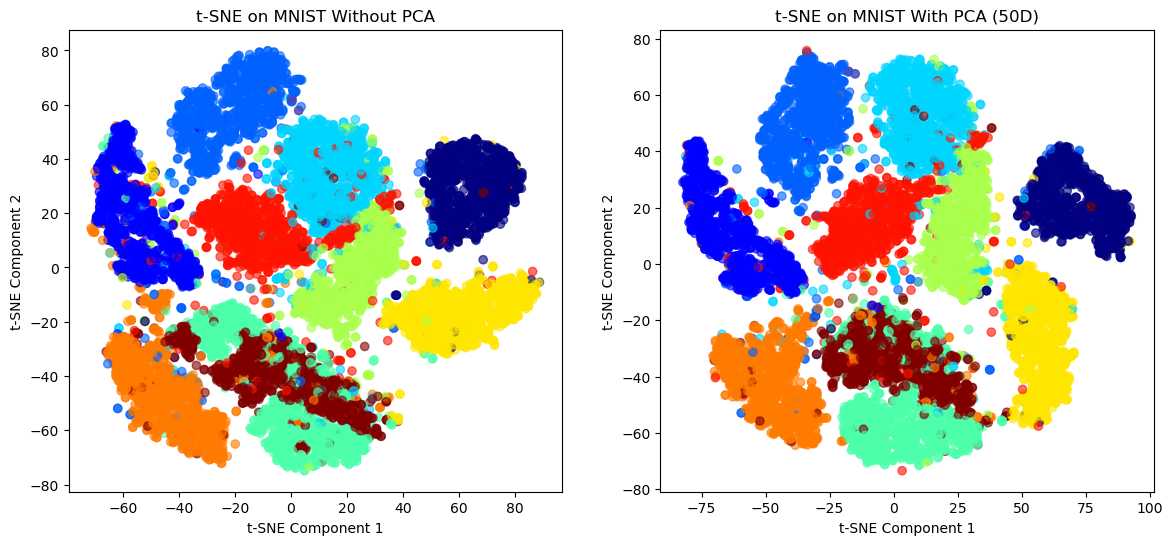

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10000, shuffle=True)

# Get a batch of data
data_iter = iter(trainloader)
images, labels = next(data_iter)
X_train = images.view(images.shape[0], -1)  # Flatten 28x28 images into 784D
y_train = labels.numpy()

# Apply PCA (reduce from 784D to 50D)
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_train)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# t-SNE on raw 784D data
X_tsne_no_pca = tsne.fit_transform(X_train)

# t-SNE on PCA-reduced 50D data
X_tsne_pca = tsne.fit_transform(X_pca)

# Plot both results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE without PCA
ax[0].scatter(X_tsne_no_pca[:, 0], X_tsne_no_pca[:, 1], c=y_train, cmap="jet", alpha=0.6)
ax[0].set_title("t-SNE on MNIST Without PCA")
ax[0].set_xlabel("t-SNE Component 1")
ax[0].set_ylabel("t-SNE Component 2")

# t-SNE with PCA
scatter = ax[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=y_train, cmap="jet", alpha=0.6)
ax[1].set_title("t-SNE on MNIST With PCA (50D)")
ax[1].set_xlabel("t-SNE Component 1")
ax[1].set_ylabel("t-SNE Component 2")

#plt.colorbar(scatter, ax=ax[1], label="Digit Label")  # Add colorbar to second plot
plt.show()

### **Example 2: CIFAR-10 Image Dataset**
**Dataset:** CIFAR-10 contains 60,000 small images in 10 categories (airplane, dog, truck, etc.).  
**Goal:** Reduce 3,072-dimensional RGB pixel data into a 2D space.  

**Expected Outcome**  
- Different objects cluster separately, but some categories (e.g., "cats" and "dogs") might have overlapping regions since they share features.

The following is to compare the visualization of CIFAR10 data, with or without PCA
- Dataset is too big, here we only use a subset (2000) of the data

Files already downloaded and verified


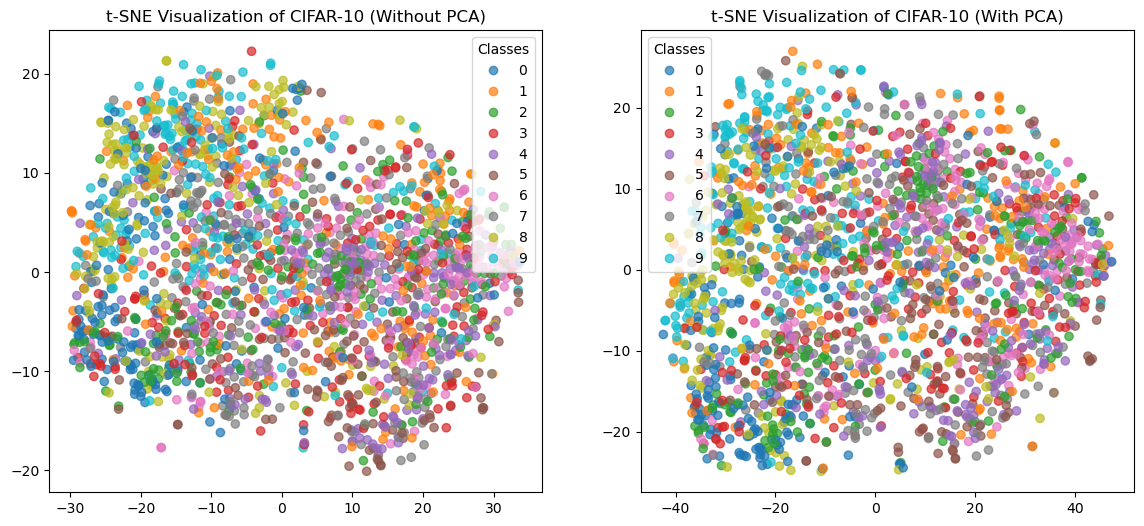

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
cifar10 = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

# Extract a subset of the data
num_samples = 2000
data = torch.stack([cifar10[i][0] for i in range(num_samples)])  # Extract images
labels = np.array([cifar10[i][1] for i in range(num_samples)])   # Extract labels

# Flatten images
data = data.view(num_samples, -1).numpy()

# Apply t-SNE without PCA
tsne_no_pca = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne_no_pca = tsne_no_pca.fit_transform(data)

# Apply PCA first, then t-SNE
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data)

tsne_with_pca = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne_with_pca = tsne_with_pca.fit_transform(data_pca)

# Plot the results side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE without PCA
scatter1 = ax[0].scatter(data_tsne_no_pca[:, 0], data_tsne_no_pca[:, 1], c=labels, cmap="tab10", alpha=0.7)
ax[0].set_title("t-SNE Visualization of CIFAR-10 (Without PCA)")
ax[0].legend(*scatter1.legend_elements(), title="Classes")

# t-SNE with PCA
scatter2 = ax[1].scatter(data_tsne_with_pca[:, 0], data_tsne_with_pca[:, 1], c=labels, cmap="tab10", alpha=0.7)
ax[1].set_title("t-SNE Visualization of CIFAR-10 (With PCA)")
ax[1].legend(*scatter2.legend_elements(), title="Classes")

plt.show()

## **Comparison of PCA vs. t-SNE for Visualization**
| Feature | PCA | t-SNE |
|---------|-----|-------|
| **Focus** | Preserves **global structure** (variance maximization) | Preserves **local structure** (neighborhoods) |
| **Embedding Type** | Linear transformation | Non-linear mapping |
| **Computation** | Fast (eigenvalue decomposition) | Slower (iterative optimization) |
| **Interpretability** | Components are ordered by variance explained | Harder to interpret axes |
| **Best Use Case** | Large-scale feature selection | Clustering and pattern discovery |